# Flood Prediction Regression Notebook

## 1. Problem Definition
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Flood Prediction Factors dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## 2. Data
There are 2 data sets:
- test.csv: the training dataset; FloodProbability is the target
- train.csv: the test dataset; your objective is to predict the FloodProbability for each row

Information can be found here:
https://www.kaggle.com/competitions/playground-series-s4e5/data

## 3. Evaluation
- will be evaluated on the r_2 score of the regression model
- Flood Probability is the target variable

## 4. Features

- There are 20 feature variables and 1 target variable
- The 20 feature variables are all dtype int64, making them categorical, all appear to be ordinal due to the normal distributions
- 1117957 entries
- There are no missing values
- All feature variables appear to have a normal distribution

### **Data Dictionary**

1. **MonsoonIntensity**
    - a seasonal prevailing wind in the region of South and Southeast Asia, blowing from the southwest between May and September and bringing rain (the wet monsoon), or from the northeast between October and April (the dry monsoon).
    - Values range from 0 to 16, ordinal category
3. **TopographyDrainage**
   - In geomorphology, drainage systems are the patterns formed by the streams, rivers, and lakes in a particular drainage basin. They are governed by the topography of land, whether a particular region is dominated by hard or soft rocks, and the gradient of the land
   - Values range from 0 to 18, ordinal category
5. RiverManagement
6. Deforestation
7. Urbanization
8. ClimateChange
9. DamsQuality
10. Siltation
11. AgriculturalPractices
12. Encroachments
13. IneffectiveDisasterPreparedness
14. DrainageSystems
15. CoastalVulnerability
16. Landslides
17. Watersheds
18. DeterioratingInfrastructure
19. PopulationScore
20. WetlandLoss
21. InadequatePlanning
22. PoliticalFactors7 non-null  int64  


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve,auc

%matplotlib inline 

In [62]:
# Import training and validation sets
df=pd.read_csv("data/train.csv",low_memory=False)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
df.head().T

,0,1,2,3,4
id,0.000,1.00,2.00,3.000,4.000
MonsoonIntensity,5.000,6.00,6.00,3.000,5.000
TopographyDrainage,8.000,7.00,5.00,4.000,3.000
RiverManagement,5.000,4.00,6.00,6.000,2.000
Deforestation,8.000,4.00,7.00,5.000,6.000
Urbanization,6.000,8.00,3.00,4.000,4.000
ClimateChange,4.000,8.00,7.00,8.000,4.000
DamsQuality,4.000,3.00,1.00,4.000,3.000
Siltation,3.000,5.00,5.00,7.000,3.000
AgriculturalPractices,3.000,4.00,4.00,6.000,3.000


In [59]:
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

### Exploring Features

In [60]:
# View all the value counts for the features. Bins go from 0 - 20 since the max value doesn't exceed this

value_counts_df = pd.DataFrame(index=range(21)) 
feature_df = df.drop("FloodProbability",axis=1)

for column in feature_df.columns:
    value_counts = df[column].value_counts().sort_index()
    value_counts.name = column
    value_counts_df = pd.concat([value_counts_df, value_counts], axis=1)

value_counts_df = value_counts_df.reindex(range(21))
value_counts_df = value_counts_df.fillna(0)
value_counts_df = value_counts_df.drop("id",axis=1)
value_counts_df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5431.0,5541.0,5407.0,5327.0,5350.0,5347.0,5878.0,5381.0,5680.0,5531.0,5410.0,5582.0,5747.0,5516.0,5404.0,4953.0,5536.0,5192.0,5619.0,5995.0
1,28946.0,29422.0,28872.0,26881.0,29672.0,27326.0,28605.0,28487.0,28587.0,27979.0,27756.0,28923.0,29108.0,29051.0,28867.0,29511.0,28093.0,27958.0,27889.0,28786.0
2,86683.0,90058.0,83782.0,85948.0,86122.0,88158.0,84763.0,87322.0,85659.0,84628.0,85851.0,84440.0,84481.0,88129.0,88319.0,85513.0,87742.0,84515.0,85421.0,86873.0
3,160574.0,161989.0,160049.0,157331.0,162234.0,159728.0,158316.0,160419.0,160403.0,160683.0,162862.0,159355.0,162674.0,163932.0,163564.0,162850.0,161487.0,161270.0,165051.0,164017.0
4,214344.0,213368.0,214079.0,219733.0,212438.0,214268.0,216308.0,215232.0,214366.0,219708.0,217365.0,216278.0,213263.0,212833.0,213627.0,218713.0,221136.0,217045.0,214851.0,215557.0
5,220936.0,221252.0,218216.0,217793.0,216722.0,218995.0,218237.0,222270.0,216644.0,219971.0,215502.0,217753.0,215378.0,213811.0,219756.0,213578.0,213102.0,214587.0,217756.0,211264.0
6,169080.0,159003.0,167368.0,169175.0,166703.0,169316.0,164786.0,164780.0,168426.0,158864.0,162108.0,167358.0,164640.0,164085.0,159072.0,168782.0,163538.0,167265.0,162099.0,163682.0
7,109210.0,102681.0,108538.0,109039.0,107693.0,107802.0,108185.0,106481.0,109213.0,106434.0,107059.0,108156.0,108310.0,109608.0,107309.0,107019.0,106364.0,109524.0,106401.0,108315.0
8,65954.0,72000.0,71204.0,69237.0,69295.0,69171.0,71757.0,68231.0,69347.0,71237.0,73046.0,71360.0,73577.0,72274.0,71822.0,67551.0,72443.0,71347.0,71588.0,72800.0
9,33515.0,37544.0,36232.0,34585.0,36854.0,34687.0,35903.0,35460.0,36004.0,37312.0,36869.0,34274.0,35817.0,35411.0,36087.0,35832.0,34422.0,34947.0,36289.0,35675.0


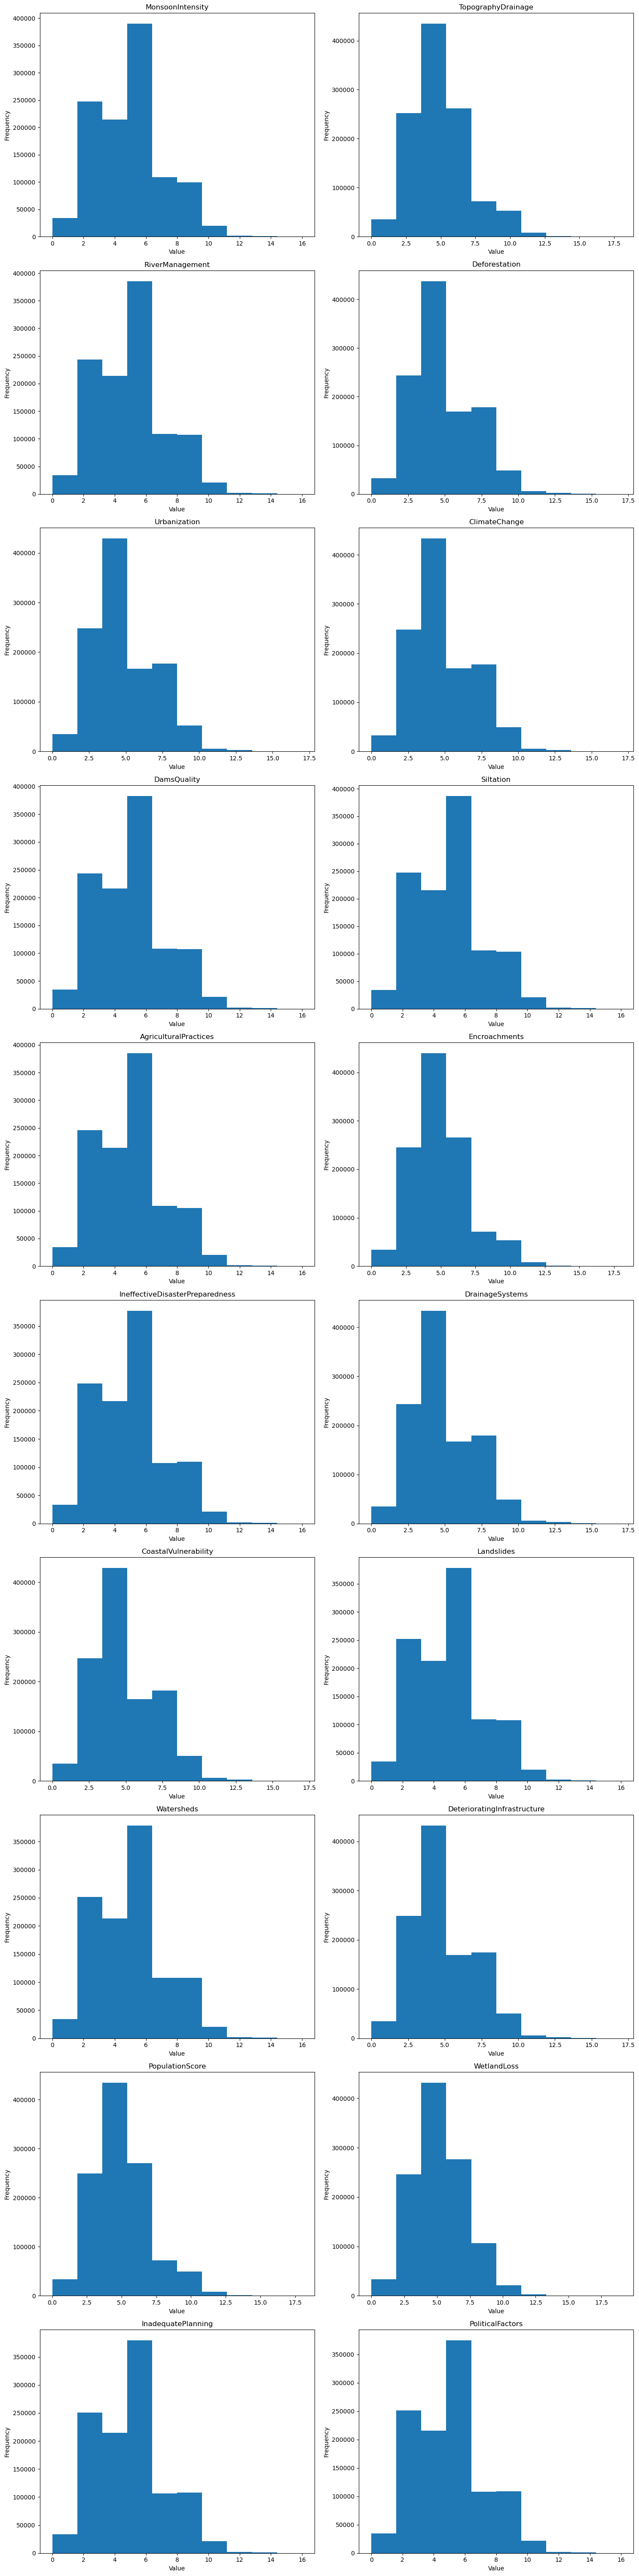

In [57]:
# Define the number of rows and columns for the grid
num_rows = 10
num_cols = 2

feature_historgrams_df=df.drop("id",axis=1)
feature_historgrams_df=feature_historgrams_df.drop("FloodProbability",axis=1)

# Create a figure and axis objects for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 60))
axs = axs.flatten()

# Iterate through each column in the DataFrame and plot a histogram
for i, column in enumerate(feature_historgrams_df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[i].hist(df[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show();

### Exploring Collinearity between features

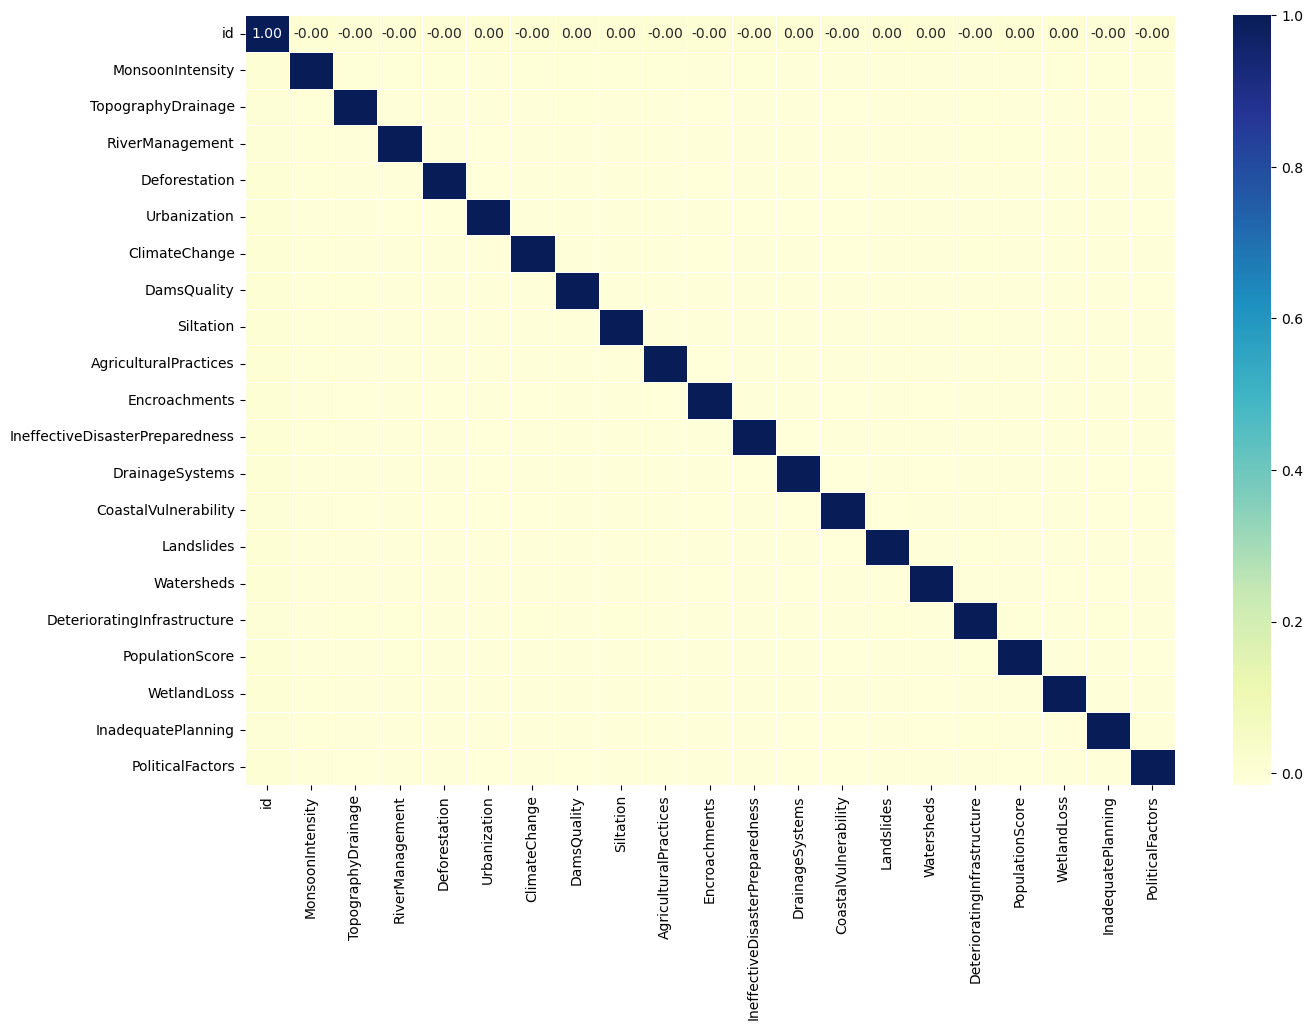

In [69]:
# Make a correlation matrix
corr_matrix=df.drop("FloodProbability",axis=1).corr()
fig,ax =plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

**Note:** There appears to be no collinearity to deal with

## 5. Modelling

In [98]:
np.random.seed(42)
X=df.drop(["FloodProbability","id"],axis=1)
y=df["FloodProbability"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
len(X_train),len(y_train)

(894365, 894365)

In [100]:
%%time
# Different RandomForestRegressor hyperparameters
rf_grid={
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None, 3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features":[0.5,1,"sqrt","log2"],
    "max_samples":[100000],
}

# Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1,random_state=42),
    param_distributions=rf_grid,
    n_iter=100,
    cv=5,
    verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 2h 51min 27s
Wall time: 24min 21s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [101]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 100000,
 'max_features': 0.5,
 'max_depth': None}

In [102]:
rs_model.score(X_test,y_test)

0.6184702223250941

In [109]:
# Most ideal hyperparameters for RandomForestRegressor
ideal_model=RandomForestRegressor(
    n_estimators=rs_model.best_params_["n_estimators"],
    min_samples_leaf=rs_model.best_params_["min_samples_leaf"],
    min_samples_split=rs_model.best_params_["min_samples_split"],
    max_features=rs_model.best_params_["max_features"],
    n_jobs=-1,
    max_samples=None,
    random_state=42
)


In [107]:
%%time
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [108]:
ideal_model.score(X_test,y_test)

0.6438563482745367